In [1]:
from google.colab import files

In [2]:
uploaded = files.upload()

Saving Time_series_analysis_DATASET.csv to Time_series_analysis_DATASET (1).csv


In [3]:
#import necessary modules
import pandas as pd
import io

**UNIVARIATE TIME SERIES MODEL WITH FACEBOOK PROPHET**


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['Time_series_analysis_DATASET.csv']))
print(df.head())

              FullDate  Tmax   SysLoad  GasPrice  ElecPrice
0  2010-09-01 00:00:00  15.8  1688.215      3.69     23.710
1  2010-09-01 01:00:00  15.8  1669.195      3.69     22.635
2  2010-09-01 02:00:00  15.8  1491.980      3.69     22.565
3  2010-09-01 03:00:00  15.8  1330.760      3.69     18.910
4  2010-09-01 04:00:00  15.8  1247.940      3.69     18.030


In [5]:
#Shape of the dataset
print(df.shape)

(92016, 5)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB
None


In [7]:
!pip install fbprophet

In [8]:
from fbprophet import Prophet

In [9]:
df["FullDate"] = pd.to_datetime(df["FullDate"])

In [10]:
df.set_index("FullDate", inplace = True)

In [11]:
print(df.head())

                     Tmax   SysLoad  GasPrice  ElecPrice
FullDate                                                
2010-09-01 00:00:00  15.8  1688.215      3.69     23.710
2010-09-01 01:00:00  15.8  1669.195      3.69     22.635
2010-09-01 02:00:00  15.8  1491.980      3.69     22.565
2010-09-01 03:00:00  15.8  1330.760      3.69     18.910
2010-09-01 04:00:00  15.8  1247.940      3.69     18.030


In [12]:
#Resampling to daily data 
df_daily = df.resample('D').sum()
print(df_daily)

             Tmax      SysLoad  GasPrice  ElecPrice
FullDate                                           
2010-09-01  379.2  41565.38000   88.5600   2751.700
2010-09-02  369.6  38898.99000   88.5600    570.810
2010-09-03  439.2  41665.76000  106.8000    504.975
2010-09-04  328.8  35638.08500   81.3600    502.275
2010-09-05  357.6  35611.41000  106.8000    500.555
...           ...          ...       ...        ...
2021-02-24  537.6  -1525.49745  134.4000    634.770
2021-02-25  518.4   4539.07855  130.5048    577.515
2021-02-26  547.2   9517.02430  130.1808   1445.495
2021-02-27  564.0   4932.88015  130.0800    488.980
2021-02-28  583.2   6675.05485  131.6352    -98.985

[3834 rows x 4 columns]


In [13]:
#Reset the index of the daily data set
df_daily = df_daily.reset_index()
print(df_daily)

       FullDate   Tmax      SysLoad  GasPrice  ElecPrice
0    2010-09-01  379.2  41565.38000   88.5600   2751.700
1    2010-09-02  369.6  38898.99000   88.5600    570.810
2    2010-09-03  439.2  41665.76000  106.8000    504.975
3    2010-09-04  328.8  35638.08500   81.3600    502.275
4    2010-09-05  357.6  35611.41000  106.8000    500.555
...         ...    ...          ...       ...        ...
3829 2021-02-24  537.6  -1525.49745  134.4000    634.770
3830 2021-02-25  518.4   4539.07855  130.5048    577.515
3831 2021-02-26  547.2   9517.02430  130.1808   1445.495
3832 2021-02-27  564.0   4932.88015  130.0800    488.980
3833 2021-02-28  583.2   6675.05485  131.6352    -98.985

[3834 rows x 5 columns]


In [14]:
#Rename two columns in the daily dataset
df_daily = df_daily.rename(columns = {"FullDate" : "ds", "ElecPrice" : "y"})

In [15]:
#The first five rows of the daily dataset
print(df_daily.head())

          ds   Tmax    SysLoad  GasPrice         y
0 2010-09-01  379.2  41565.380     88.56  2751.700
1 2010-09-02  369.6  38898.990     88.56   570.810
2 2010-09-03  439.2  41665.760    106.80   504.975
3 2010-09-04  328.8  35638.085     81.36   502.275
4 2010-09-05  357.6  35611.410    106.80   500.555


In [16]:
#Check the shape of the daily dataset
print(df_daily.shape)

(3834, 5)


In [17]:
#Split the daily dataset to test and train set
#The train set
train = df_daily[["ds", "y"]][:2757]

In [18]:
#The first five rows of the train set
print(train.head())

          ds         y
0 2010-09-01  2751.700
1 2010-09-02   570.810
2 2010-09-03   504.975
3 2010-09-04   502.275
4 2010-09-05   500.555


In [19]:
#The shape of the train set
print(train.shape)

(2757, 2)


In [20]:
#The test set
test = df_daily[["ds", "y"]][2757:]

#The first five rows of the test set
print(test.head())

             ds        y
2757 2018-03-20  1833.00
2758 2018-03-21  1730.49
2759 2018-03-22  2260.55
2760 2018-03-23  2138.76
2761 2018-03-24  1721.70


In [21]:
#The shape of the test set
print(test.shape)

(1077, 2)


In [22]:
#Instantiate the model 
model = Prophet()

In [23]:
#Fit the train set to the model
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
forecast = model.predict(test)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,212.291576,4897.167470,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,288.482474,5032.864520,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,617.414100,5189.350568,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,266.435831,5058.470447,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221
4,2018-03-24,2695.030663,-181.127129,4784.267100,2695.030663,2695.030663,-438.662722,-438.662722,-438.662722,-271.372061,-271.372061,-271.372061,-167.290660,-167.290660,-167.290660,0.0,0.0,0.0,2256.367941


In [25]:
y_pred = forecast['yhat'].values
y_true = test["y"].values


In [26]:
import matplotlib.pyplot as plt 
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [27]:
#Question 14
#Define MAPE
def mape(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return round(np.mean(np.abs((y_true - y_pred)/y_true)) * 100, 2)

MAPE = mape(y_true, y_pred)
MAPE

549.48

In [28]:
#Question 15
rmse = sqrt(mean_squared_error(y_true, y_pred))
rmse

3218.15577651241

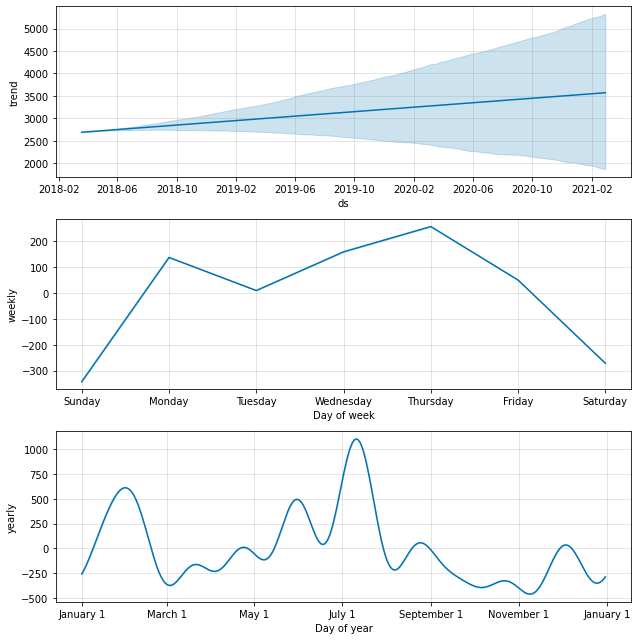

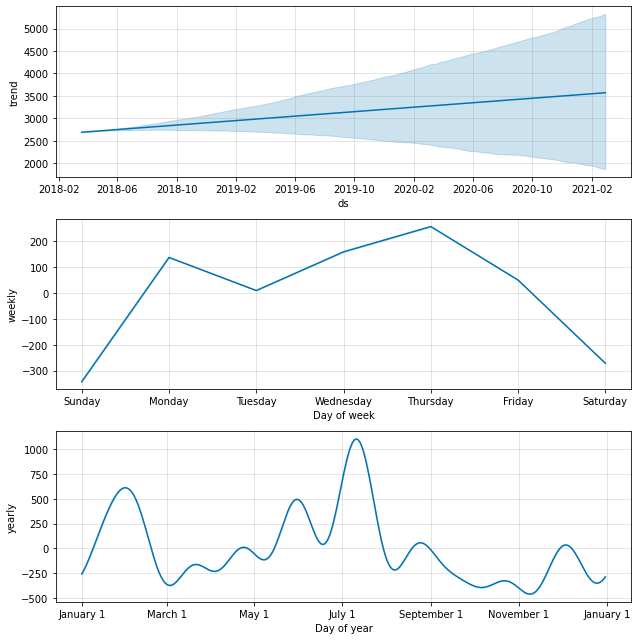

In [29]:
#Question 16
model.plot_components(forecast)

July has the highest value of the yearly seasonality.

**MULTIVARIATE TIME SERIES FORECASTING WITH FACEBOOK PROPHET**

In [30]:
df_daily_multi = df_daily.rename(columns = {'SysLoad' : 'add1', 'Tmax' : 'add2', 'GasPrice' : 'add3'})
df_daily_multi.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [31]:
#The first five rows and shape of the train set for the multivariate model
train_multi = df_daily_multi[:2757]
print(train_multi.head())
print(train_multi.shape)

          ds   add2       add1    add3         y
0 2010-09-01  379.2  41565.380   88.56  2751.700
1 2010-09-02  369.6  38898.990   88.56   570.810
2 2010-09-03  439.2  41665.760  106.80   504.975
3 2010-09-04  328.8  35638.085   81.36   502.275
4 2010-09-05  357.6  35611.410  106.80   500.555
(2757, 5)


In [32]:
#The first five rows and shape of the test set for the multivariate model
test_multi = df_daily_multi[2757:]
print(test_multi.head())
print(test_multi.shape)

             ds   add2         add1      add3        y
2757 2018-03-20  540.0   7696.91130  201.5880  1833.00
2758 2018-03-21  571.2   4658.05865  203.2560  1730.49
2759 2018-03-22  722.4  19161.78525  203.2560  2260.55
2760 2018-03-23  811.2  18090.43435  198.6456  2138.76
2761 2018-03-24  832.8   3763.53865  180.2160  1721.70
(1077, 5)


In [33]:
#Instantiate model
m = Prophet()
m.add_regressor('add1')
m.add_regressor('add2')
m.add_regressor('add3')
m.fit(train_multi)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
m.predict(test_multi)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1866.816008,-168.427156,4234.890754,1866.816008,1866.816008,-854.927934,-854.927934,-854.927934,0.232346,...,-84.367504,-84.367504,-84.367504,-38.643882,-38.643882,-38.643882,0.0,0.0,0.0,1991.737865
1,2018-03-21,1867.512671,-126.090061,4073.184202,1867.512671,1867.512671,-1024.653099,-1024.653099,-1024.653099,0.229590,...,42.497418,42.497418,42.497418,-29.294910,-29.294910,-29.294910,0.0,0.0,0.0,1983.421127
2,2018-03-22,1868.209334,879.912227,5120.779474,1868.209334,1868.209334,-214.594937,-214.594937,-214.594937,0.216232,...,145.822951,145.822951,145.822951,-24.204766,-24.204766,-24.204766,0.0,0.0,0.0,2902.578272
3,2018-03-23,1868.905997,293.374611,4873.177620,1868.905997,1868.905997,-274.431734,-274.431734,-274.431734,0.208387,...,-44.133439,-44.133439,-44.133439,-23.232775,-23.232775,-23.232775,0.0,0.0,0.0,2586.725457
4,2018-03-24,1869.602660,-745.470766,3668.758590,1869.602660,1869.602660,-1074.613585,-1074.613585,-1074.613585,0.206479,...,-117.735502,-117.735502,-117.735502,-26.128782,-26.128782,-26.128782,0.0,0.0,0.0,1440.034805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,2021-02-24,2613.638806,-1297.492148,3299.961143,1805.397312,3368.890723,-1370.015380,-1370.015380,-1370.015380,0.232558,...,42.497418,42.497418,42.497418,-433.966750,-433.966750,-433.966750,0.0,0.0,0.0,968.116139
1073,2021-02-25,2614.335469,-1066.926104,3725.402892,1805.159425,3371.372112,-1031.298343,-1031.298343,-1031.298343,0.234254,...,145.822951,145.822951,145.822951,-460.424670,-460.424670,-460.424670,0.0,0.0,0.0,1327.184016
1074,2021-02-26,2615.032132,-1066.537685,3619.746331,1804.921538,3374.083070,-753.271482,-753.271482,-753.271482,0.231710,...,-44.133439,-44.133439,-44.133439,-481.109661,-481.109661,-481.109661,0.0,0.0,0.0,1390.504500
1075,2021-02-27,2615.728795,-1445.788791,3394.876652,1804.470716,3376.794029,-1009.303844,-1009.303844,-1009.303844,0.230226,...,-117.735502,-117.735502,-117.735502,-495.783335,-495.783335,-495.783335,0.0,0.0,0.0,1045.410966


In [35]:
forecast = m.predict(test_multi)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1866.816008,-226.896091,4419.574396,1866.816008,1866.816008,-854.927934,-854.927934,-854.927934,0.232346,...,-84.367504,-84.367504,-84.367504,-38.643882,-38.643882,-38.643882,0.0,0.0,0.0,1991.737865
1,2018-03-21,1867.512671,-25.807668,4209.238629,1867.512671,1867.512671,-1024.653099,-1024.653099,-1024.653099,0.229590,...,42.497418,42.497418,42.497418,-29.294910,-29.294910,-29.294910,0.0,0.0,0.0,1983.421127
2,2018-03-22,1868.209334,572.264828,5032.808175,1868.209334,1868.209334,-214.594937,-214.594937,-214.594937,0.216232,...,145.822951,145.822951,145.822951,-24.204766,-24.204766,-24.204766,0.0,0.0,0.0,2902.578272
3,2018-03-23,1868.905997,358.788221,4888.652580,1868.905997,1868.905997,-274.431734,-274.431734,-274.431734,0.208387,...,-44.133439,-44.133439,-44.133439,-23.232775,-23.232775,-23.232775,0.0,0.0,0.0,2586.725457
4,2018-03-24,1869.602660,-839.668439,3781.925306,1869.602660,1869.602660,-1074.613585,-1074.613585,-1074.613585,0.206479,...,-117.735502,-117.735502,-117.735502,-26.128782,-26.128782,-26.128782,0.0,0.0,0.0,1440.034805


In [36]:
y_true = test_multi['y'].values
y_pred = forecast['yhat'].values

In [37]:
#Question 17
MAPE = mape(y_true, y_pred)
MAPE

233.74

In [38]:
#Question 18
rms = sqrt(mean_squared_error(y_true, y_pred))
round(rms, 2)

2709.65

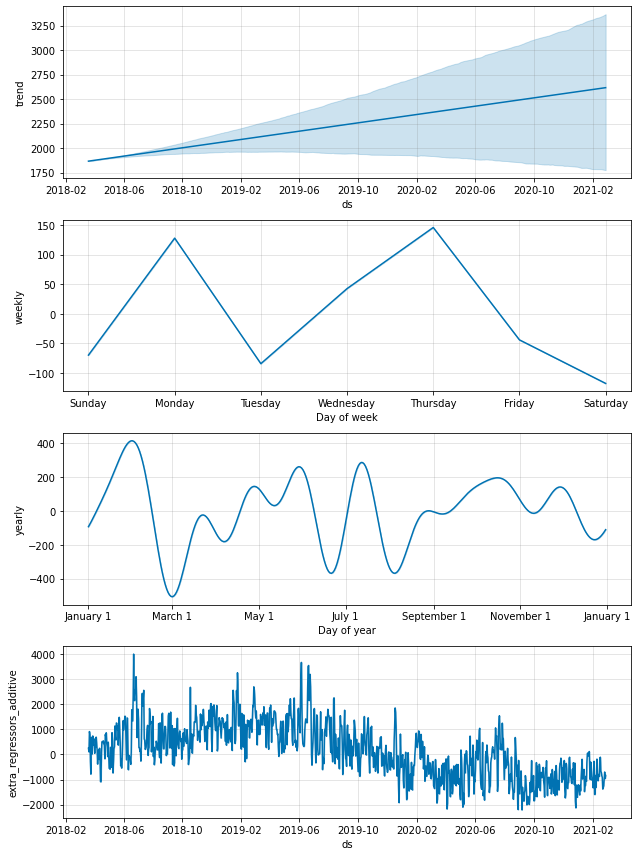

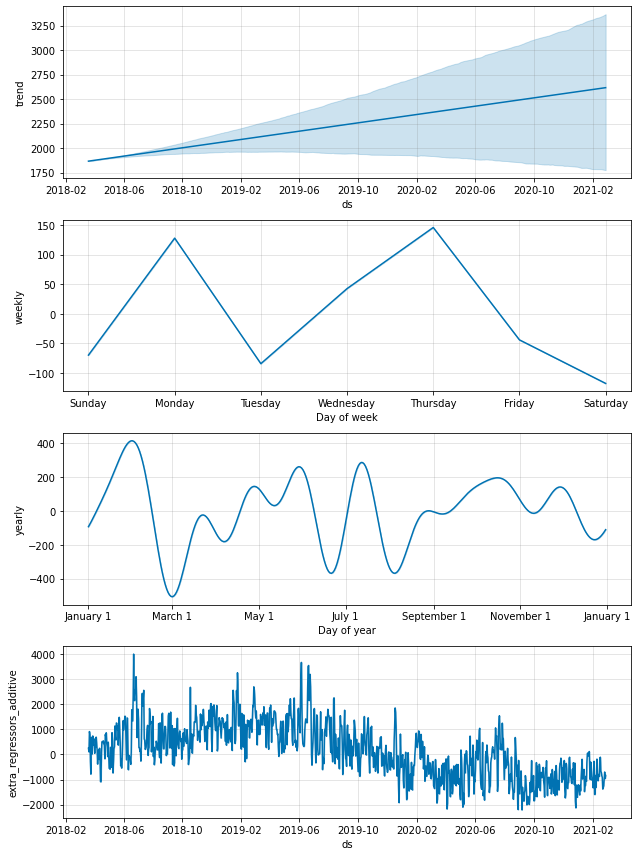

In [39]:
#Question 19
m.plot_components(forecast)

Thursday has the highest value of the daily seasonality.

In [40]:
#Question 20
df_daily_multi2 = df_daily.rename(columns = {'SysLoad' : 'add1', 'GasPrice' : 'add3'}).drop(columns = 'Tmax')
df_daily_multi.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [41]:
#The first five rows and shape of the train set for the 2nd multivariate model
train_multi2 = df_daily_multi2[:2757]
print(train_multi2.head())
print(train_multi2.shape)

          ds       add1    add3         y
0 2010-09-01  41565.380   88.56  2751.700
1 2010-09-02  38898.990   88.56   570.810
2 2010-09-03  41665.760  106.80   504.975
3 2010-09-04  35638.085   81.36   502.275
4 2010-09-05  35611.410  106.80   500.555
(2757, 4)


In [42]:
#The first five rows and shape of the test set for the 2nd multivariate model
test_multi2 = df_daily_multi2[2757:]
print(test_multi2.head())
print(test_multi2.shape)

             ds         add1      add3        y
2757 2018-03-20   7696.91130  201.5880  1833.00
2758 2018-03-21   4658.05865  203.2560  1730.49
2759 2018-03-22  19161.78525  203.2560  2260.55
2760 2018-03-23  18090.43435  198.6456  2138.76
2761 2018-03-24   3763.53865  180.2160  1721.70
(1077, 4)


In [43]:
#Instantiate model
mo = Prophet()
mo.add_regressor('add1')
mo.add_regressor('add3')
mo.fit(train_multi)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [44]:
forecast = mo.predict(test_multi2)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add3,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1873.736349,-174.242715,4064.216868,1873.736349,1873.736349,-856.217792,-856.217792,-856.217792,1101.173980,...,-84.272057,-84.272057,-84.272057,-38.232850,-38.232850,-38.232850,0.0,0.0,0.0,1996.187630
1,2018-03-21,1874.447367,-224.270601,4200.998990,1874.447367,1874.447367,-1026.199027,-1026.199027,-1026.199027,1125.642280,...,42.671221,42.671221,42.671221,-28.872483,-28.872483,-28.872483,0.0,0.0,0.0,1987.689358
2,2018-03-22,1875.158384,640.106440,5051.280366,1875.158384,1875.158384,-214.918703,-214.918703,-214.918703,1125.642280,...,145.282901,145.282901,145.282901,-23.766355,-23.766355,-23.766355,0.0,0.0,0.0,2907.398506
3,2018-03-23,1875.869402,458.342514,4868.752966,1875.869402,1875.869402,-274.845778,-274.845778,-274.845778,1058.011195,...,-44.097347,-44.097347,-44.097347,-22.773979,-22.773979,-22.773979,0.0,0.0,0.0,2592.163493
4,2018-03-24,1876.580419,-618.240860,3884.298675,1876.580419,1876.580419,-1076.234889,-1076.234889,-1076.234889,787.662889,...,-117.803753,-117.803753,-117.803753,-25.645550,-25.645550,-25.645550,0.0,0.0,0.0,1444.559116


In [45]:
y_true = test_multi2['y'].values
y_pred2 = forecast['yhat'].values

In [46]:
MAPE = mape(y_true, y_pred2)
MAPE

236.66